In [1]:
from Bio import SeqIO
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import seaborn as sns
import random

In [2]:
def length_distribution(fasta_name):
    path = 'Data/Fasta/'
    length_dict = {}
    for record in SeqIO.parse(fasta_name, 'fasta'):
        idtag = str(record.id)
        seq = str(record.seq)
        length_dict[idtag] = len(seq)
    # dict -> list
    length_list = []
    for value in length_dict.values():
        length_list.append(value)
    print('Total Records:%s'%len(length_list))
    print('Max length:%s'%max(length_list))
    text = ('Total Records:%s'%len(length_list)+'\n'+'Max length:%s'%max(length_list))
    sns.set()
    sns.displot(length_list,bins=50, kde=False)
    plt.title( 'Length Distribution', fontfamily = 'serif', fontsize = '14' )
    plt.xlabel('Sequence Length', fontfamily = 'serif', fontsize = '12' )
    plt.ylabel('Count', fontfamily = 'serif', fontsize = '12' )   
    plt.show()



Total Records:30799
Max length:68850


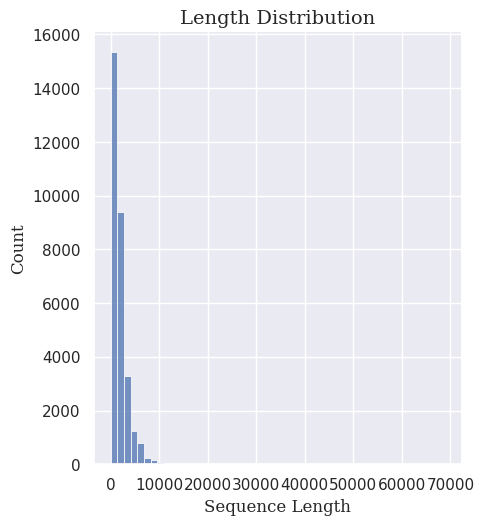

In [3]:
length_distribution('dmel_all_CDS.fasta')

Total Records:2995
Max length:21216


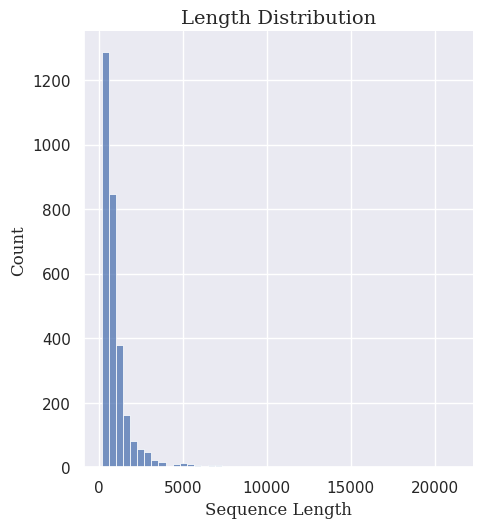

In [4]:
length_distribution('dmel_lncRNA.fasta')

In [5]:
def read_fasta_seqs_lengths(fasta_name):
    seqs = {}
    lengths = []
    for record in SeqIO.parse(fasta_name, 'fasta'):
        idtag = str(record.id)
        seq = str(record.seq)
        length = len(record.seq)
        seqs[idtag] = seq
        lengths.append(length)
    return seqs, lengths

In [6]:
seqs_base, lengths_base = read_fasta_seqs_lengths('dmel_lncRNA.fasta')
seqs_all, lengths_all = read_fasta_seqs_lengths('dmel_all_CDS.fasta')
sorted_seqa_all = dict(sorted(seqs_all.items(), key= lambda x: len(x[1]), reverse=True))
sorted_lengths_all = sorted(lengths_all, reverse=True)
seqs_nearest = {}
for length in lengths_base:
    nearest_lentgth = min(lengths_all, key=lambda x:abs(x-length))
    index_min = lengths_all.index(nearest_lentgth)
    nearest_key = list(seqs_all)[index_min]
    nearest_val = list(seqs_all.values())[index_min]
    seqs_nearest[nearest_key] = nearest_val
    seqs_all.pop(nearest_key)
    lengths_all.pop(index_min)
file_name = 'seqs_nearest'
with open('%s.fasta'%file_name, 'w') as fasta:
    for key, value in seqs_nearest.items():
        fasta.write('>'+key+'\n')
        fasta.write(value+'\n')

Total Records:2995
Max length:23835


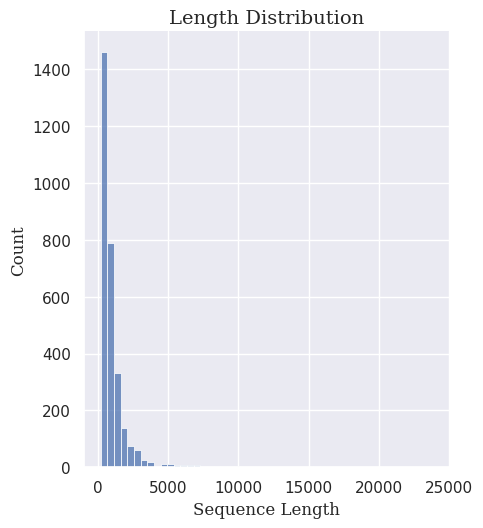

In [7]:
length_distribution('seqs_nearest.fasta')